In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
#Q1 Import data
data = np.loadtxt("sunspots.txt")

Text(0, 0.5, '$|c_k|$')

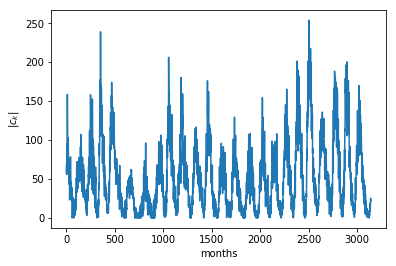

In [3]:
plot = plt.plot(data[:,0],data[:,1])
plt.xlabel('months')
plt.ylabel('$|c_k|$')

In [4]:
#function for DFT based on http://www-personal.umich.edu/~mejn/cp/programs/dft.py
def dft(data):
    N = len(data)
    c = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += data[n]*np.exp(-2j*pi*k*n/N)
    return c

In [5]:
#Use DFT to calcualte(and FFT to check)
c = dft(data[:,1])
d = np.fft.fft(data[:,1])

Text(0, 0.5, '$|c_k|^2/10^8$')

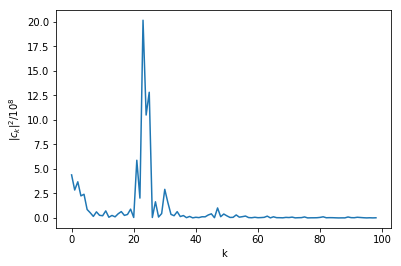

In [6]:
#Plot Result
plt.plot(abs(c[1:100])**2/(10**8))
plt.xlabel('k')
plt.ylabel('$|c_k|^2/10^8$')
#plt.plot(abs(d[0:100]))

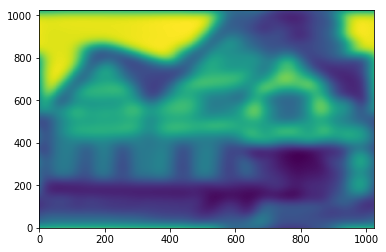

In [7]:
#Q2
#Load Data
data = np.loadtxt("blur.txt")
data = np.flip(data)
plt.pcolormesh(data)

In [8]:
def Gaussian2D(x,y,sig):
    return np.exp(-(x**2+y**2)/(2*sig**2))

In [9]:
#create grid
x = np.arange(0, 513, 1)
y = np.arange(0, 513, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z1 = Gaussian2D(xx, yy, 25)

In [10]:
#create Point spread function
z = np.zeros((1024,1024))
for i in range(1024):
    for j in range(1024):
        if i<513 and j<513:
            z[i,j] = z1[i,j]
        elif i>512 and j<513:
            z[i,j] = z1[1024-i,j]
        elif i<512 and j>512:
            z[i,j] = z1[i,1024-j]
        else:
            z[i,j] = z1[1024-i,1024-j]
        

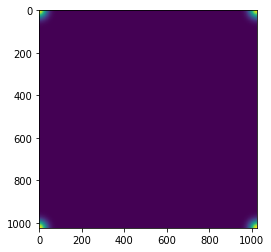

In [11]:
plt.imshow(z)
#plt.pcolormesh(z)

In [12]:
#Deconvolution
zfft = np.fft.rfft2(z)
datafft = np.fft.rfft2(data)
img = datafft
for i in range(1024):
    for j in range(512):
        if abs(zfft[i,j])>10**(-3):
            img[i,j] = img[i,j]/zfft[i,j]
ubimg = np.fft.irfft2(img)

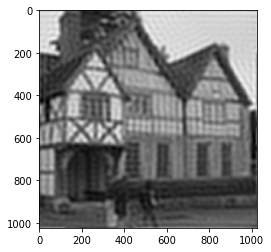

In [13]:
#Plot result
import matplotlib as pt
plt.imshow(np.flip(ubimg),cmap = pt.cm.gray)

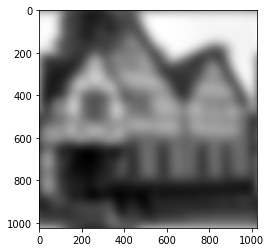

In [313]:
plt.imshow(np.flip(data),cmap = pt.cm.gray)